In [1]:
#firebase
import pandas as pd
import firebase_admin
from firebase_admin import credentials
from firebase_admin import firestore
#gensim
import pandas as pd
import numpy as np
import random
from tqdm import tqdm
from gensim.models import Word2Vec
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import gensim.downloader as api
import json
from gensim.models import KeyedVectors
from gensim.test.utils import common_texts
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
import spacy
import time
from sklearn.metrics.pairwise import cosine_similarity
from gensim.similarities import WmdSimilarity
from itertools import chain
from collections import Counter
%matplotlib inline

/home/hugo/anaconda3/lib/python3.8/site-packages/gensim/similarities/__init__.py:10: UserWarning: The gensim.similarities.levenshtein submodule is disabled, because the optional Levenshtein package <https://pypi.org/project/python-Levenshtein/> is unavailable. Install Levenhstein (e.g. `pip install python-Levenshtein`) to suppress this warning.
  warnings.warn(


In [2]:
df = pd.read_csv('skill2vec_50K.csv', sep=',', header=None)

/home/hugo/anaconda3/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3146: DtypeWarning: Columns (34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,219,220,221,222,223,224,225,226,227,228,229,230,231,232,233,234,235,236,237,238,239,240,241,242,243,244,245,246,247,248,249,250,251,252,253,254,255,256,257,258,259,260,261,262,263,264,265,266,267,268,269,270,271,272

In [3]:
df.head()

,0,1,2,3,4,5,6,7,8,9,...,951,952,953,954,955,956,957,958,959,960
0,125720,HR Executive,screening,selection,Interview,HR,Recruiter,IT Recruiter,Sourcing,recruitment executive,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,112708,Special Teacher,Teaching,Education,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,115226,consulting,fresher,IT helpdesk,Techincal Troubleshooting,international voice,international BPO,technical support,outsourcing,call center,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,19805,diploma,machining,cnc m,mould,conventional machines,die making,knowledge,tool,cipet,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,80208,Compensation,Benefits,HR Functions,Alm,Payroll,ESS,Core HR,QC,QA,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
df = df.drop(0, 1)

In [5]:
df.head()

,1,2,3,4,5,6,7,8,9,10,...,951,952,953,954,955,956,957,958,959,960
0,HR Executive,screening,selection,Interview,HR,Recruiter,IT Recruiter,Sourcing,recruitment executive,onboarding,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Special Teacher,Teaching,Education,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,consulting,fresher,IT helpdesk,Techincal Troubleshooting,international voice,international BPO,technical support,outsourcing,call center,BBA fresher,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,diploma,machining,cnc m,mould,conventional machines,die making,knowledge,tool,cipet,assembly,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Compensation,Benefits,HR Functions,Alm,Payroll,ESS,Core HR,QC,QA,SQL,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
skills = df.values.tolist()

In [7]:
cleanedList = [[str(x).lower() for x in y if str(x) != 'nan'] for y in skills]

In [8]:
max_lst = 0
for lst in cleanedList:
    if (len(lst) > max_lst):
        max_lst = len(lst)
print(max_lst)

960


In [9]:
top100skills = Counter(chain.from_iterable(cleanedList)).most_common(10)

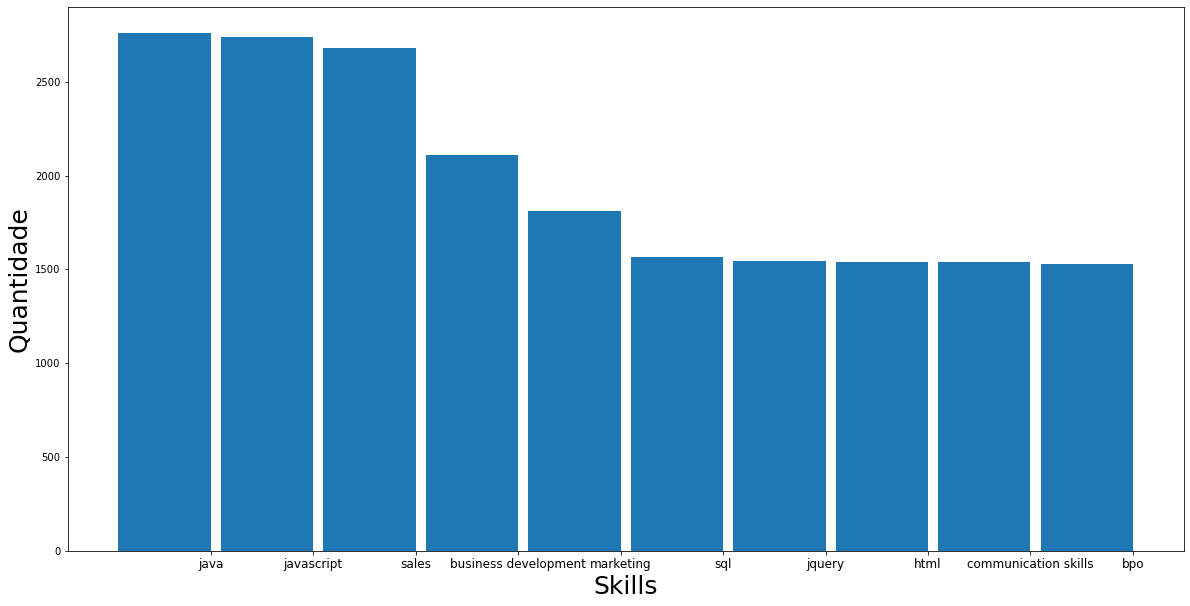

In [10]:
f, ax = plt.subplots(figsize=(20,10))
ax.xaxis.label.set_size(20)
ax.set_xlabel('Skills', fontsize=25)
ax.set_ylabel('Quantidade', fontsize=25)
labels, values = zip(*top100skills)

indexes = np.arange(len(labels))
width = 0.9

plt.bar(indexes, values, width)
plt.xticks(indexes + width * 0.5, labels, fontsize=12)
plt.show()

In [11]:
model = Word2Vec(cleanedList, vector_size=300, min_count=2, window=max_lst, sg =1)

In [12]:
model.wv.most_similar('scala', topn=50)

[('eclipse modeling', 0.9064251780509949),
 ('r studio', 0.9039016366004944),
 ('nosql db', 0.9030278921127319),
 ('no - sql', 0.901763916015625),
 ('nltk', 0.9004884958267212),
 ('flink', 0.8988358974456787),
 ('specialist engineer', 0.8988217711448669),
 ('impala', 0.894879162311554),
 ('nosql database', 0.8947954773902893),
 ('informatica big data', 0.8943014740943909),
 ('saltstack', 0.8884749412536621),
 ('big-data', 0.8884567618370056),
 ('storm', 0.8883270621299744),
 ('boot', 0.8870747685432434),
 ('machine_learing', 0.8864302635192871),
 ('open_stack', 0.8843639492988586),
 ('graph database', 0.8834720253944397),
 ('mapr', 0.8831884264945984),
 ('kafka', 0.8828633427619934),
 ('micro service', 0.8826162219047546),
 ('hadoop admin', 0.8825661540031433),
 ('rundeck', 0.8819321990013123),
 ('big data developer', 0.8818890452384949),
 ('cloud engine', 0.8818142414093018),
 ('java_virtual_machine', 0.8807929754257202),
 ('akka_or_erlang', 0.8807306885719299),
 ('spark ml', 0.880032

In [13]:
model.wv.similarity('kafka', 'zookeeper')

0.9377824

In [14]:
model.wv.similarity('kafka', 'spark')

0.8896235

In [15]:
model.wv.similarity('kafka', 'sqoop')

0.91594785

In [16]:
model.wv.similarity('eclipse modeling', 'zookeeper')

0.9100788

In [17]:
model.wv.similarity('eclipse modeling', 'spark')

0.9252129

In [18]:
model.wv.similarity('eclipse modeling', 'sqoop')

0.9551742

In [19]:
model.wv.similarity('impala', 'zookeeper')

0.90526307

In [20]:
model.wv.similarity('impala', 'spark')

0.9088679

In [21]:
model.wv.similarity('impala', 'sqoop')

0.91890216

In [22]:
instance = WmdSimilarity(cleanedList, model.wv, num_best=100)

In [31]:
start = time.time()
sims = instance['javascript', 'css', 'php']
end = time.time()
print(end - start)

32.30882000923157


In [32]:
sims

[(30794, 0.8020346354671858),
 (46354, 0.7919757872031157),
 (41165, 0.7727594178451775),
 (44669, 0.7727594178451775),
 (23366, 0.7727594178451775),
 (21246, 0.7727594178451775),
 (46326, 0.7723427338611786),
 (10324, 0.7469628221834925),
 (6453, 0.7397156168676989),
 (32159, 0.7321927911308131),
 (48737, 0.7121929855606235),
 (15129, 0.7072498281754114),
 (15454, 0.6975890174970422),
 (8603, 0.6968415677040557),
 (42228, 0.6964306202164536),
 (16285, 0.6955550622304089),
 (25462, 0.6950686613503227),
 (41861, 0.6950686613503227),
 (27232, 0.6944511638402779),
 (49753, 0.6943609141284912),
 (5005, 0.6941504392308856),
 (16942, 0.6927055589458848),
 (7481, 0.6910680843977971),
 (47164, 0.6901922112783968),
 (46743, 0.6900703263618925),
 (5397, 0.6884939911499472),
 (9564, 0.6878450555892404),
 (28783, 0.6827440711001362),
 (41007, 0.6814525639506654),
 (18544, 0.6810024170738664),
 (465, 0.680503946978517),
 (36805, 0.6791645713226607),
 (18968, 0.6785436528333909),
 (45196, 0.67835320

In [33]:
for sim in sims:
    print(cleanedList[sim[0]])

['javascript', 'jquery', 'php']
['angular js', 'php', 'javascript']
['html', 'css', 'javascript']
['html', 'css', 'javascript']
['javascript', 'html', 'css']
['javascript', 'html', 'css']
['css', 'javascript']
['html_and_css_and_javascript', 'react.js', 'javascript', 'php', 'mysql', 'css']
['html content', 'creating new web pages', 'designed template', 'html', 'css', 'php', 'javascript', 'html5', 'web developer', 'web -developer']
['javascript', 'css', 'php', 'web development', 'web technologies']
['json', 'javascript', 'css', 'mysql']
['htmltechnical lead', 'module leadapi', 'php', 'javascript', 'web application security', 'drupal']
['ux', 'jquery', 'javascript', 'css']
['html', 'magento', 'wordpress', 'php', 'mysql', 'drupal', 'javascript', 'css', 'jquery', 'ajax', 'javascript', 'css', 'jquery', 'php', 'html']
['javascript', 'css', 'html', 'ui']
['php developer', 'jquery', 'javascript', 'html', 'css', 'php', 'mysql']
['angular js', 'javascript', 'html', 'css']
['angular js', 'javascr

In [34]:
def display_closestwords_tsnescatterplot(model, word):
    
    arr = np.empty((0,300), dtype='f')
    word_labels = [word]

    # get close words
    close_words = model.wv.most_similar(word, topn=50)
    
    # add the vector for each of the closest words to the array
    arr = np.append(arr, np.array([model.wv[word]]), axis=0)
    for wrd_score in close_words:
        wrd_vector = model.wv[wrd_score[0]]
        word_labels.append(wrd_score[0])
        arr = np.append(arr, np.array([wrd_vector]), axis=0)
        
    # find tsne coords for 2 dimensions
    tsne = TSNE(n_components=2, random_state=0)
    np.set_printoptions(suppress=True)
    Y = tsne.fit_transform(arr)

    x_coords = Y[:, 0]
    y_coords = Y[:, 1]
    # display scatter plot
    plt.figure(figsize=(12,12))
    colors = cm.rainbow(np.linspace(0, 1, len(arr)))
    plt.scatter(x_coords, y_coords, c=colors)

    for label, x, y in zip(word_labels, x_coords, y_coords):
        plt.annotate(label, xy=(x, y), xytext=(5, 2), textcoords='offset points', ha='right', va='bottom')
    plt.xlim(x_coords.min()+0.00005, x_coords.max()+0.00005)
    plt.ylim(y_coords.min()+0.00005, y_coords.max()+0.00005)
    plt.show()

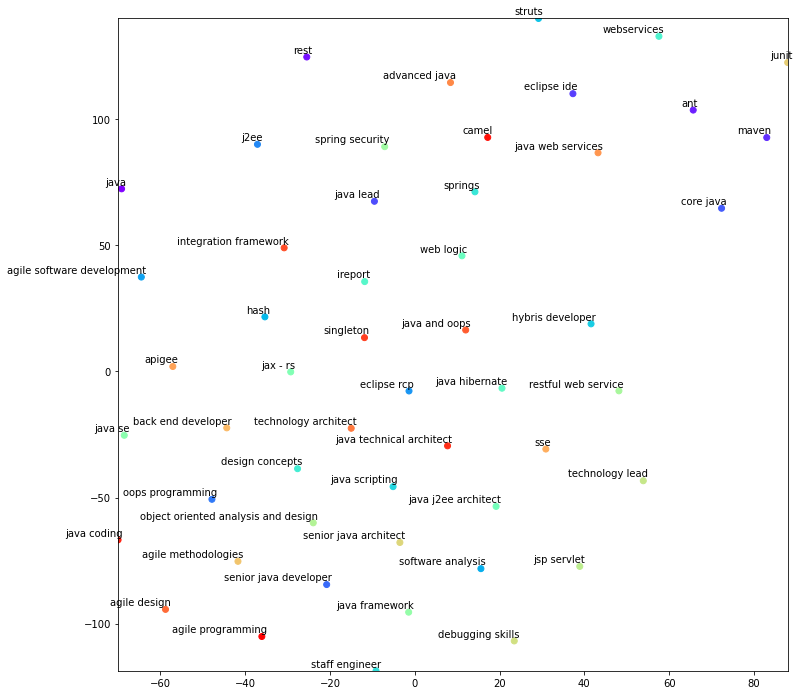

In [35]:
display_closestwords_tsnescatterplot(model, 'java')

In [36]:
#model.save("skills2vec.model")

In [37]:
#model = Word2Vec.load('skills2vec.model')

In [38]:
model.wv.most_similar('elasticsearch')

[('mapreduce', 0.9187520146369934),
 ('adtech', 0.9169662594795227),
 ('distributed', 0.9155200719833374),
 ('native_app_development', 0.9059423804283142),
 ('internal_tools', 0.90446537733078),
 ('ibm cloud', 0.9036883115768433),
 ('impala', 0.9032876491546631),
 ('rescue', 0.8994380235671997),
 ('firebase', 0.8969189524650574),
 ('distribute', 0.8966023921966553)]

In [39]:
model_dice = KeyedVectors.load_word2vec_format('musthave_dice_naruki_200d.model')

In [40]:
model_dice.most_similar('elasticsearch')

[('rabbitmq', 0.9142909646034241),
 ('apache_storm', 0.9141814112663269),
 ('couchbase', 0.9081527590751648),
 ('elastic_search', 0.9046273231506348),
 ('clojure', 0.9044978618621826),
 ('backend_development', 0.9029039144515991),
 ('rubyonrails', 0.9020692110061646),
 ('amazon_dynamodb', 0.8938170671463013),
 ('js_framework', 0.8915183544158936),
 ('ruby_rail_developer', 0.8910452127456665)]

In [49]:
skills_to_compare_models = ['php', 'javascript', 'java', 'ejb', 'css', 'hadoop', 'javax', 'spring', 'soap', 'web service', 'deploy', 'cicd', 'elasticsearch', 'c++', 'release', 'github', 'xml', 'http', 'rest', 'mysql', 'sqlserver', 'oracle', 'mariadb', 'nosql', 'devops', 'cloud', 'backend', 'frontend', 'fullstack', 'mongodb']

In [47]:
#Comparativo entre o modelo do Aplicai e o modelo do Skill2Vec
counter = 0
for index, skill in enumerate(skills_to_compare_models):
    if skill in model_dice.key_to_index:
        counter+=1
        print(model_dice.most_similar(skill.lower()))
        print(model.wv.most_similar(skill.lower()))
print(f'total {counter}')

[('drupal', 0.8600917458534241), ('php_developer', 0.8415486812591553), ('core_php', 0.8394343852996826), ('zend_framework', 0.8356329798698425), ('magento', 0.8322199583053589), ('joomla', 0.8314899802207947), ('wordpress', 0.826111376285553), ('opencart', 0.8200944066047668), ('cake_php', 0.8190937638282776), ('shopify', 0.8178319334983826)]
[('magento', 0.7602148652076721), ('wordpress', 0.7551963329315186), ('drupal', 0.753109872341156), ('zend framework', 0.7351915836334229), ('corephp', 0.7350481152534485), ('zencart', 0.7330186367034912), ('codeigniter', 0.731476366519928), ('magento developer', 0.7286330461502075), ('oscommerce', 0.7266883850097656), ('yii framework', 0.7257028222084045)]
[('html5', 0.8143879175186157), ('css3', 0.8076002597808838), ('ajax', 0.7923631072044373), ('bootstrap', 0.7810050249099731), ('jquery', 0.7780387997627258), ('web_development', 0.7730005383491516), ('json', 0.7725080251693726), ('ui_development', 0.7681609392166138), ('xhtml', 0.764492213726

In [20]:
info = api.info()
print(json.dumps(info, indent=4))

{
    "corpora": {
        "semeval-2016-2017-task3-subtaskBC": {
            "num_records": -1,
            "record_format": "dict",
            "file_size": 6344358,
            "reader_code": "https://github.com/RaRe-Technologies/gensim-data/releases/download/semeval-2016-2017-task3-subtaskB-eng/__init__.py",
            "license": "All files released for the task are free for general research use",
            "fields": {
                "2016-train": [
                    "..."
                ],
                "2016-dev": [
                    "..."
                ],
                "2017-test": [
                    "..."
                ],
                "2016-test": [
                    "..."
                ]
            },
            "description": "SemEval 2016 / 2017 Task 3 Subtask B and C datasets contain train+development (317 original questions, 3,169 related questions, and 31,690 comments), and test datasets in English. The description of the tasks and the collect

In [21]:
def display_closestwords_tsnescatterplot_pre_trained(model, word, vector_size):
    
    arr = np.empty((0,vector_size), dtype='f')
    word_labels = [word]

    # get close words
    close_words = model.most_similar(word, topn=50)
    
    # add the vector for each of the closest words to the array
    arr = np.append(arr, np.array([model[word]]), axis=0)
    for wrd_score in close_words:
        wrd_vector = model[wrd_score[0]]
        word_labels.append(wrd_score[0])
        arr = np.append(arr, np.array([wrd_vector]), axis=0)
        
    # find tsne coords for 2 dimensions
    tsne = TSNE(n_components=2, random_state=0)
    np.set_printoptions(suppress=True)
    Y = tsne.fit_transform(arr)

    x_coords = Y[:, 0]
    y_coords = Y[:, 1]
    # display scatter plot
    plt.figure(figsize=(12,12))
    colors = cm.rainbow(np.linspace(0, 1, len(arr)))
    plt.scatter(x_coords, y_coords, c=colors)

    for label, x, y in zip(word_labels, x_coords, y_coords):
        plt.annotate(label, xy=(x, y), xytext=(5, 2), textcoords='offset points', ha='right', va='bottom')
    plt.xlim(x_coords.min()+0.00005, x_coords.max()+0.00005)
    plt.ylim(y_coords.min()+0.00005, y_coords.max()+0.00005)
    plt.show()

In [22]:
model_glove_twitter = api.load('glove-twitter-200')

In [23]:
model_glove_twitter.most_similar('java', topn=50)

[('developer', 0.6804163455963135),
 ('c++', 0.6445408463478088),
 ('javascript', 0.5837357640266418),
 ('sql', 0.5836789608001709),
 ('oracle', 0.565355122089386),
 ('software', 0.5506511926651001),
 ('sharepoint', 0.5197974443435669),
 ('windows', 0.519537627696991),
 ('server', 0.5184795260429382),
 ('html', 0.5169185996055603),
 ('developers', 0.5121346116065979),
 ('programmer', 0.5098596215248108),
 ('perl', 0.5055326819419861),
 ('python', 0.5017238855361938),
 ('linux', 0.5005338191986084),
 ('drupal', 0.49724119901657104),
 ('programming', 0.495327889919281),
 ('opera', 0.49470868706703186),
 ('engineer', 0.49306797981262207),
 ('web', 0.49071940779685974),
 ('mysql', 0.4872756898403168),
 ('css', 0.4848442077636719),
 ('php', 0.4831404983997345),
 ('ruby', 0.47958528995513916),
 ('android', 0.47563573718070984),
 ('wordpress', 0.47246748208999634),
 ('project', 0.4724123179912567),
 ('development', 0.47022196650505066),
 ('unix', 0.4698059856891632),
 ('database', 0.467433810

In [24]:
model_fast_text_wiki = api.load('fasttext-wiki-news-subwords-300')

KeyboardInterrupt: 

In [ ]:
model_fast_text_wiki.most_similar('java', topn=100)

In [ ]:
display_closestwords_tsnescatterplot_pre_trained(model_glove_twitter, 'java', 200)

In [ ]:
display_closestwords_tsnescatterplot_pre_trained(model_fast_text_wiki, 'java', 300)

In [ ]:
display_closestwords_tsnescatterplot(model, 'postgres')